In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("wines_SPA.csv")
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [4]:
le = LabelEncoder()
df["winery"] = le.fit_transform(df["winery"])
df["wine"] = le.fit_transform(df["wine"])
df["year"] = le.fit_transform(df["year"])
df["country"] = le.fit_transform(df["country"])
df["type"] = le.fit_transform(df["type"])
df["region"] = le.fit_transform(df["region"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   int64  
 1   wine         7500 non-null   int64  
 2   year         7500 non-null   int64  
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   int64  
 6   region       7500 non-null   int64  
 7   price        7500 non-null   float64
 8   type         7500 non-null   int64  
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 644.7 KB


In [6]:
df.isnull().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
country           0
region            0
price             0
type              0
body           1169
acidity        1169
dtype: int64

In [7]:
df = df.drop(["body", "acidity"], axis=1)

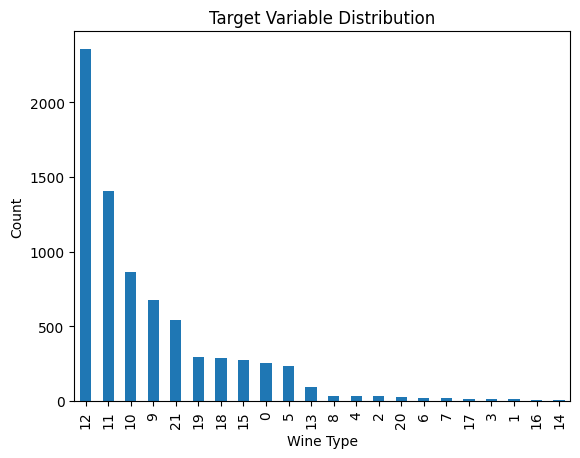

In [8]:
df["type"].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution")
plt.xlabel("Wine Type")
plt.ylabel("Count")
plt.show()


In [9]:
corr = df.corr()
print(corr["type"].sort_values(ascending=False))

type           1.000000
region         0.271435
year           0.172060
wine           0.161590
num_reviews   -0.001946
price         -0.024484
rating        -0.026705
winery        -0.122144
country             NaN
Name: type, dtype: float64


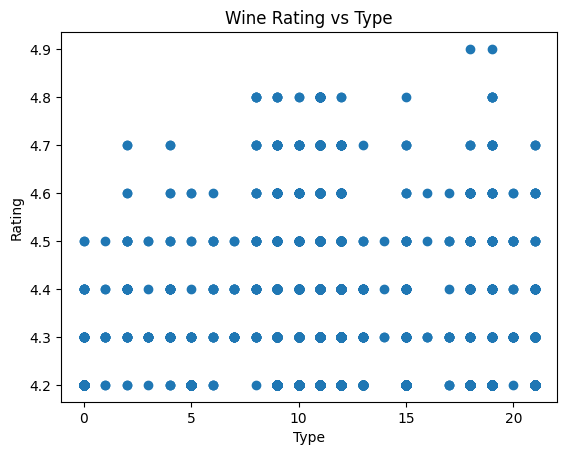

In [10]:
plt.scatter(df["type"], df["rating"])
plt.title("Wine Rating vs Type")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()


In [11]:
X = df.drop(["type", "winery", "wine", "region", "country"], axis=1)
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
svc_rbf = SVC(C=2.0, kernel='rbf', gamma='scale', class_weight='balanced')
svc_rbf.fit(X_train, y_train)
y_pred_rbf = svc_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.072
              precision    recall  f1-score   support

           0       0.20      0.02      0.03        66
           1       0.05      0.33      0.09         3
           2       0.02      0.40      0.04         5
           3       0.00      0.00      0.00         1
           4       0.02      0.10      0.03        10
           5       0.05      0.90      0.10        67
           6       0.03      0.17      0.05         6
           7       0.00      0.00      0.00         8
           8       0.13      0.56      0.21         9
           9       0.40      0.01      0.02       172
          10       0.00      0.00      0.00       228
          11       0.80      0.04      0.08       363
          12       0.34      0.07      0.12       557
          13       0.00      0.00      0.00        24
          14       0.02      1.00      0.04         2
          15       0.00      0.00      0.00        69
          16       0.04      0.50      0.08         2


C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [ ]:
svc_poly = SVC(C=1.0, kernel='poly', degree=2, gamma=1, class_weight='balanced')
svc_poly.fit(X_train, y_train)

print(f"The Accuracy of Poly Model is {svc_poly.score(X_test, y_test):.4f}")

In [ ]:
params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'degree': [2, 4],
    'class_weight': ['balanced']
}

svm = GridSearchCV(SVC(), params, cv=5)
svm.fit(X_train, y_train)

print("Best Parameters:", svm.best_params_)
print("Best Cross-Validation Score:", svm.best_score_)
print("Test Accuracy:", svm.score(X_test, y_test))